# Dataset loading

**a. Library installations**

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2
!pip install scikeras

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


**b. Data loading and preview**

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format


# Load the dataset
path = "/content/cardtransactions.csv"

df = pd.read_csv(path, low_memory=False)

In [ ]:
# View the first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


**Data exploration**

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


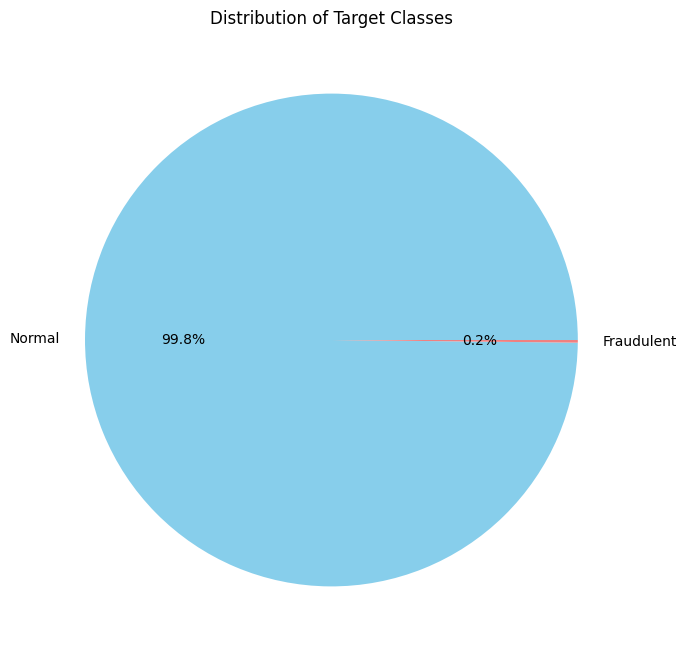

In [ ]:
import matplotlib.pyplot as plt

class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    class_counts.values,
    labels=["Normal", "Fraudulent"],
    autopct="%1.1f%%",
    colors=["skyblue", "lightcoral"],
)
plt.title("Distribution of Target Classes")
plt.show()

In [ ]:
# Output class distribution
print("Class count:", class_counts)

Class count: Class
0    284315
1       492
Name: count, dtype: int64


# Data pre-processing

**a. Data Cleaning**

In [ ]:
# check for duplicates
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.00,-0.53,0.87,1.35,0.15,0.41,0.10,0.71,0.18,-0.29,...,0.05,0.21,-0.19,0.00,0.10,-0.55,-0.07,0.02,6.14,0
35,26.00,-0.54,0.87,1.35,0.15,0.43,0.09,0.69,0.18,-0.29,...,0.05,0.21,-0.19,0.00,0.10,-0.55,-0.08,0.03,1.77,0
113,74.00,1.04,0.13,0.18,1.11,0.44,0.95,-0.04,0.35,0.12,...,0.10,0.61,0.02,-0.63,0.48,-0.17,0.08,0.00,1.18,0
114,74.00,1.04,0.13,0.18,1.11,0.44,0.95,-0.04,0.35,0.12,...,0.10,0.61,0.02,-0.63,0.48,-0.17,0.08,0.00,1.18,0
115,74.00,1.04,0.13,0.18,1.11,0.44,0.95,-0.04,0.35,0.12,...,0.10,0.61,0.02,-0.63,0.48,-0.17,0.08,0.00,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.00,1.91,-0.46,-1.75,0.45,2.09,4.16,-0.88,1.08,1.02,...,-0.52,-1.34,0.47,0.62,-0.28,-1.08,0.07,-0.04,11.99,0
283483,171627.00,-1.46,1.37,0.82,-0.60,-0.69,-0.49,-0.30,0.88,0.05,...,0.29,0.95,-0.22,0.08,0.04,0.64,0.21,0.12,6.82,0
283485,171627.00,-1.46,1.38,0.81,-0.60,-0.71,-0.47,-0.28,0.88,0.05,...,0.28,0.95,-0.22,0.08,0.04,0.64,0.22,0.12,11.93,0
284191,172233.00,-2.67,3.16,-3.36,1.01,-0.38,-0.11,-0.67,2.31,-1.64,...,0.39,0.27,-0.08,-0.10,0.09,-0.45,-1.18,-0.22,55.66,0


In [ ]:
duplicate_count = df.duplicated().sum()
print("Duplicate count:", duplicate_count)

Duplicate count: 1081


In [ ]:
df.drop_duplicates(inplace=True)
duplicate_count = df.duplicated().sum()
print("Duplicate count after removing duplicates:", duplicate_count)

Duplicate count after removing duplicates: 0


updated_class_count = df['Class'].value_counts()
updated_class_count

In [ ]:
# Check for null or missing values
df.isnull().sum().max()

0

**b. Feature Selection**

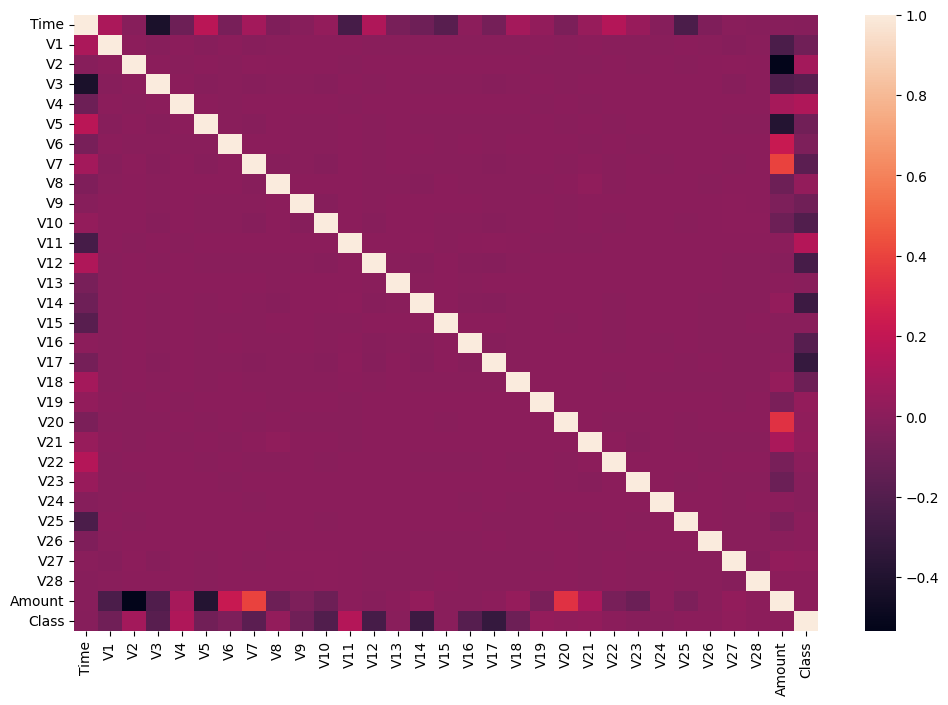

In [ ]:
import seaborn as sns
# Visualize the correlation between the numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), fmt=".2f")
plt.show()

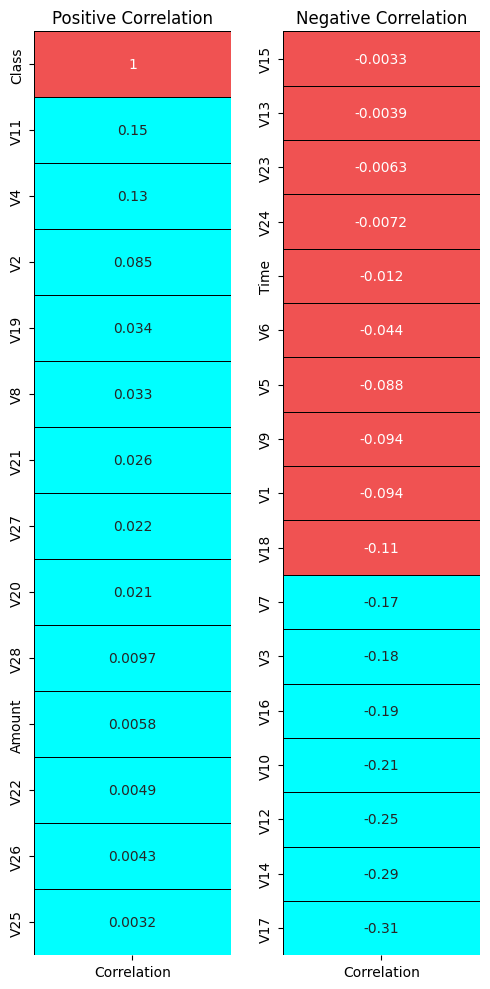

In [ ]:
colors = ['#0ff', '#f05252']

corr = df.corrwith(df['Class']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlation']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 10))

plt.subplot(1, 2, 1)
sns.heatmap(corr.iloc[:14, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False)
plt.title('Positive Correlation')

plt.subplot(1, 2, 2)
sns.heatmap(corr.iloc[14:31], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False)
plt.title('Negative Correlation')

fig.tight_layout(w_pad=2)

In [ ]:
feature_df = df[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep=True)
feature_df.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


**c. Data Balancing**

In [ ]:
from collections import Counter

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
# Split features and target
X = feature_df.drop('Class', axis=1)
y = feature_df['Class']

print("Original class distribution:", Counter(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("After SMOTE oversampling:", Counter(y_train_smote))

# Random Undersampling
undersampler = RandomUnderSampler(random_state=42, )
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
print("After Random Undersampling:", Counter(y_train_under))

# Combine SMOTE + Undersampling
over = SMOTE(sampling_strategy=0.1, random_state=42)  # minority to 10% of majority
under = RandomUnderSampler(sampling_strategy=0.5)     # majority to 50% of minority
pipeline = Pipeline(steps=[('o', over), ('u', under)])
X_train_comb, y_train_comb = pipeline.fit_resample(X_train, y_train)
print("After combined SMOTE + Undersampling:", Counter(y_train_comb))


Original class distribution: Counter({0: 283253, 1: 473})
After SMOTE oversampling: Counter({0: 198277, 1: 198277})
After Random Undersampling: Counter({0: 331, 1: 331})
After combined SMOTE + Undersampling: Counter({0: 39654, 1: 19827})


# Model Development

- Logistic Regression (linear)
- Random forest  (tree based - ensemble)
- CNN/RNN (neural network)

In [ ]:
# Training setup
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, log_loss, accuracy_score


def model_train_test(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    # Evaluate the model
    recall_normal, recall_fraudulent = recall_score(y_test, y_pred, labels=[0, 1], average=None)

    print(f"Recall Score (Fraudulent): {recall_fraudulent:.2f}")
    print("----"*10)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_normal, precision_fraudulent = precision_score(y_test, y_pred, labels=[0, 1], average=None)
    f1_normal, f1_fraudulent = f1_score(y_test, y_pred, labels=[0, 1], average=None)
    logloss = log_loss(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)

    # Store metrics
    performance_metrics = {
        "Recall (Fraudulent)": recall_fraudulent,
        "Recall (Normal)": recall_normal,
        "Precision (Fraudulent)": precision_fraudulent,
        "Precision (Normal)": precision_normal,
        "F1-Score (Fraudulent)": f1_fraudulent,
        "F1-Score (Normal)": f1_normal,
        "AUC-ROC": auc_roc,
        "Log Loss": logloss,
        "Accuracy": accuracy,
    }
    return performance_metrics

In [ ]:
# Model definitions

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier


logistic_regression = LogisticRegression(random_state=42, class_weight='balanced')
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')

def build_neural_network():
    neural_network = Sequential([
        Input(shape=(X_train_under.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    neural_network.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['recall'])
    return neural_network

keras_classifier = KerasClassifier(model=build_neural_network, verbose=0, random_state=42, class_weight='balanced')

models = {
    "Logistic Regression": logistic_regression,
    "Random Forest": random_forest,
    "Neural Network": keras_classifier
}

score_results = []

**a. Model training with original data**

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    performance_metrics = model_train_test(model, X_train, y_train, X_test, y_test)
    score_results.append({"Algorithm": model_name, "Data type": "Original", **performance_metrics})
    print("----"*10)

Training Logistic Regression...
Recall Score (Fraudulent): 0.88
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.06      0.88      0.11       142

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.98      0.99     85118

----------------------------------------
Training Random Forest...
Recall Score (Fraudulent): 0.75
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.95      0.75      0.83       142

    accuracy                           1.00     85118
   macro avg       0.97      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118

----------------------------------------
Training Neura

**b. Model training with Oversampled data**

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    performance_metrics = model_train_test(model, X_train_smote, y_train_smote, X_test, y_test)
    score_results.append({"Algorithm": model_name, "Data type": "Oversampled", **performance_metrics})
    print("----"*10)

Training Logistic Regression...
Recall Score (Fraudulent): 0.88
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

----------------------------------------
Training Random Forest...
Recall Score (Fraudulent): 0.75
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.72      0.75      0.74       142

    accuracy                           1.00     85118
   macro avg       0.86      0.88      0.87     85118
weighted avg       1.00      1.00      1.00     85118

----------------------------------------
Training Neura

**c. Model training with undersampled data**

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    performance_metrics = model_train_test(model, X_train_under, y_train_under, X_test, y_test)
    score_results.append({"Algorithm": model_name, "Data type": "Undersampled", **performance_metrics})
    print("----"*10)

Training Logistic Regression...
Recall Score (Fraudulent): 0.88
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

----------------------------------------
Training Random Forest...
Recall Score (Fraudulent): 0.88
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84976
           1       0.04      0.88      0.07       142

    accuracy                           0.96     85118
   macro avg       0.52      0.92      0.53     85118
weighted avg       1.00      0.96      0.98     85118

----------------------------------------
Training Neura

**d. Model training with Combined data**

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    performance_metrics = model_train_test(model, X_train_comb, y_train_comb, X_test, y_test)
    score_results.append({"Algorithm": model_name, "Data type": "Combined", **performance_metrics})
    print("----"*10)

Training Logistic Regression...
Recall Score (Fraudulent): 0.88
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

----------------------------------------
Training Random Forest...
Recall Score (Fraudulent): 0.80
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.52      0.80      0.63       142

    accuracy                           1.00     85118
   macro avg       0.76      0.90      0.81     85118
weighted avg       1.00      1.00      1.00     85118

----------------------------------------
Training Neura

In [ ]:
df_results = pd.DataFrame(score_results)
df_results

,Algorithm,Data type,Recall (Fraudulent),Recall (Normal),Precision (Fraudulent),Precision (Normal),F1-Score (Fraudulent),F1-Score (Normal),AUC-ROC,Log Loss,Accuracy
0,Logistic Regression,Original,0.88,0.98,0.06,1.00,0.11,0.99,0.93,0.90,0.98
1,Random Forest,Original,0.75,1.00,0.95,1.00,0.83,1.00,0.87,0.02,1.00
2,Neural Network,Original,0.91,0.95,0.03,1.00,0.06,0.98,0.93,1.67,0.95
3,Logistic Regression,Oversampled,0.88,0.97,0.05,1.00,0.10,0.99,0.93,1.00,0.97
4,Random Forest,Oversampled,0.75,1.00,0.72,1.00,0.74,1.00,0.88,0.03,1.00
5,Neural Network,Oversampled,0.87,0.99,0.12,1.00,0.22,0.99,0.93,0.38,0.99
6,Logistic Regression,Undersampled,0.88,0.97,0.05,1.00,0.09,0.99,0.93,1.02,0.97
7,Random Forest,Undersampled,0.88,0.96,0.04,1.00,0.07,0.98,0.92,1.40,0.96
8,Neural Network,Undersampled,0.85,0.70,0.00,1.00,0.01,0.82,0.77,10.91,0.70
9,Logistic Regression,Combined,0.88,0.97,0.05,1.00,0.10,0.99,0.93,0.99,0.97


In [ ]:

# 'Recall (Fraudulent)' is the primary metric for "best performing"
# Group by 'Data type' and find the max 'Recall (Fraudulent)' for each data type
best_per_datatype = df_results.loc[df_results.groupby('Data type')['Recall (Fraudulent)'].idxmax()]
print("Best performing dataset type for each data balancing method based on Recall (Fraudulent):")
print(best_per_datatype[['Data type', 'Algorithm', 'Recall (Fraudulent)']])

# To find the single best performing dataset type overall, find the maximum 'Recall (Fraudulent)' across all entries
overall_best_row = df_results.loc[df_results['Recall (Fraudulent)'].idxmax()]
print("\nOverall best performing dataset type and algorithm based on Recall (Fraudulent):")
print(f"Data type: {overall_best_row['Data type']}")
print(f"Algorithm: {overall_best_row['Algorithm']}")
print(f"Recall (Fraudulent): {overall_best_row['Recall (Fraudulent)']:.2f}")


Best performing dataset type for each data balancing method based on Recall (Fraudulent):
       Data type            Algorithm  Recall (Fraudulent)
11      Combined       Neural Network                 0.89
2       Original       Neural Network                 0.91
3    Oversampled  Logistic Regression                 0.88
6   Undersampled  Logistic Regression                 0.88

Overall best performing dataset type and algorithm based on Recall (Fraudulent):
Data type: Original
Algorithm: Neural Network
Recall (Fraudulent): 0.91


# Hyperparameter Tuning

**a. Tuning models**

Fine-tune the hyperparameters of the chosen algorithm to optimize the model's performance and avoid model overfitting.

In [ ]:
from sklearn.model_selection import GridSearchCV

def gridsearch_train_test(classifier, param_grid, x_train, y_train):
    classifier_grid_search = GridSearchCV(estimator=classifier,
                          param_grid=param_grid,
                          cv=3,
                          verbose=3,
                          scoring='recall')

    classifier_grid_search.fit(x_train, y_train) # Fit the GridSearchCV object


    # Get the best parameters and score
    best_params = classifier_grid_search.best_params_
    best_score = classifier_grid_search.best_score_
    classifier_best_estimator = classifier_grid_search.best_estimator_

    print("Best Parameters:", best_params)
    print("Best Score:", round(best_score, 2))

    return classifier_best_estimator, best_params


In [ ]:
# Logistic regression tuning

logistic_regression_instance = LogisticRegression(random_state=42, class_weight='balanced')
parameter_grid = {
    'C': [0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg', 'liblinear']
}
logistic_regression_optimised, logistic_best_params = gridsearch_train_test(
    logistic_regression_instance, parameter_grid, X_train, y_train
    )

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.918 total time=   0.9s
[CV 2/3] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.892 total time=   0.8s
[CV 3/3] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.882 total time=   0.7s
[CV 1/3] END C=0.1, penalty=l2, solver=newton-cg;, score=0.918 total time=   0.7s
[CV 2/3] END C=0.1, penalty=l2, solver=newton-cg;, score=0.892 total time=   0.7s
[CV 3/3] END C=0.1, penalty=l2, solver=newton-cg;, score=0.882 total time=   0.7s
[CV 1/3] END C=0.1, penalty=l2, solver=liblinear;, score=0.918 total time=   0.6s
[CV 2/3] END C=0.1, penalty=l2, solver=liblinear;, score=0.892 total time=   0.6s
[CV 3/3] END C=0.1, penalty=l2, solver=liblinear;, score=0.882 total time=   0.7s
[CV 1/3] END .....C=1, penalty=l2, solver=lbfgs;, score=0.918 total time=   0.9s
[CV 2/3] END .....C=1, penalty=l2, solver=lbfgs;, score=0.892 total time=   1.0s
[CV 3/3] END .....C=1, penalty=l2, solver=l

In [ ]:
# Random Forest Grid Search

parameter_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
random_forest_instance = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest_optimised, random_forest_best_params = gridsearch_train_test(
    random_forest_instance, parameter_grid, X_train, y_train
    )

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.873 total time=  40.5s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.856 total time=  56.3s
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.818 total time=  40.6s
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.873 total time= 1.4min
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.856 total time= 1.4min
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.809 total time= 1.4min
[CV 1/3] END max_depth=5, min_samples_split=5, n_estimators=100;, score=0.873 total time=  40.5s
[CV 2/3] END max_depth=5, min_samples_split=5, n_estimators=100;, score=0.847 total time=  41.7s
[CV 3/3] END max_depth=5, min_samples_split=5, n_estimators=100;, score=0.818 total time=  40.4s
[CV 1/3] END max_depth=5, min_samples_split=5, n_estimators=200;, s

In [ ]:
# Neural Network Grid Search

keras_classifier_instance = KerasClassifier(
    model=build_neural_network, verbose=0, random_state=42, class_weight='balanced'
    )

parameter_grid = {
    'batch_size': [16, 32],
    'epochs': [5, 10]
}
neural_network_optimised, neural_network_best_params = gridsearch_train_test(
    keras_classifier_instance, parameter_grid, X_train, y_train
    )

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ...........batch_size=16, epochs=5;, score=0.918 total time= 2.3min
[CV 2/3] END ...........batch_size=16, epochs=5;, score=0.892 total time= 3.3min
[CV 3/3] END ...........batch_size=16, epochs=5;, score=0.891 total time= 2.3min
[CV 1/3] END ..........batch_size=16, epochs=10;, score=0.918 total time= 4.7min
[CV 2/3] END ..........batch_size=16, epochs=10;, score=0.901 total time= 4.7min
[CV 3/3] END ..........batch_size=16, epochs=10;, score=0.873 total time= 4.7min
[CV 1/3] END ...........batch_size=32, epochs=5;, score=0.927 total time= 1.3min
[CV 2/3] END ...........batch_size=32, epochs=5;, score=0.883 total time=  59.8s
[CV 3/3] END ...........batch_size=32, epochs=5;, score=0.891 total time= 1.5min
[CV 1/3] END ..........batch_size=32, epochs=10;, score=0.900 total time= 2.4min
[CV 2/3] END ..........batch_size=32, epochs=10;, score=0.838 total time= 2.4min
[CV 3/3] END ..........batch_size=32, epochs=10;,

**b. Evaluating tuned models**
- Compare the performance of different models using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, area under the receiver operating characteristic curve (AUC-ROC), Confusion matrix, and Logarithmic loss (Log Loss).
- Comparative analysis to identify the best-performing model for classification.

In [ ]:
# Define models for comparison
models = [
    ("Logistic Regression", logistic_regression_optimised, logistic_best_params),
    ("Random Forest", random_forest_optimised, random_forest_best_params),
    ("Neural Network", neural_network_optimised, neural_network_best_params)
]

# Dictionary to store performance metrics
performance_metrics = []

# Evaluate each model
for model_name, model, best_param in models:
    print(f"Evaluating {model_name}...")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_normal, precision_fraudulent = precision_score(y_test, y_pred, labels=[0, 1], average=None)
    f1_normal, f1_fraudulent = f1_score(y_test, y_pred, labels=[0, 1], average=None)
    recall_normal, recall_fraudulent = recall_score(y_test, y_pred, labels=[0, 1], average=None)
    auc_roc = roc_auc_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)

    # Store metrics
    performance_metrics.append({
        "Model Name": model_name,
        "Recall (Fraudulent)": recall_fraudulent,
        "Recall (Normal)": recall_normal,
        "Precision (Fraudulent)": precision_fraudulent,
        "Precision (Normal)": precision_normal,
        "F1-Score (Fraudulent)": f1_fraudulent,
        "F1-Score (Normal)": f1_normal,
        "AUC-ROC": auc_roc,
        # "Accuracy": accuracy,
        # "Log Loss": logloss,
        "Best Parameters": best_param
    })


# Comparative analysis of model performance
performance_df = pd.DataFrame(performance_metrics)
performance_df.sort_values(by="Recall (Fraudulent)", ascending=False, inplace=True)

print("\nComparative Analysis of Model Performance:")
performance_df

Evaluating Logistic Regression...
Evaluating Random Forest...
Evaluating Neural Network...

Comparative Analysis of Model Performance:


,Model Name,Recall (Fraudulent),Recall (Normal),Precision (Fraudulent),Precision (Normal),F1-Score (Fraudulent),F1-Score (Normal),AUC-ROC,Best Parameters
2,Neural Network,0.91,0.97,0.04,1.00,0.08,0.98,0.94,"{'batch_size': 32, 'epochs': 5}"
0,Logistic Regression,0.88,0.98,0.06,1.00,0.11,0.99,0.93,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}"
1,Random Forest,0.85,1.00,0.30,1.00,0.45,1.00,0.92,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."


In [ ]:
# Highlight the best-performing model
best_model_name = performance_df['Model Name'].iloc[0]
print(f"\nBest-performing model: {best_model_name}")


Best-performing model: Neural Network


# Model Deployment

- Deploy the model to generate predictions for new and previously unseen data.


In [ ]:
import pickle


models = {
    "Logistic Regression": logistic_regression_optimised,
    "Random Forest": random_forest_optimised,
    "Neural Network": neural_network_optimised
}

# Save the best-performing model for deployment

best_model = models[best_model_name]
with open("best_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Function to preprocess new data
def preprocess_new_data(new_data):
    """
    Preprocesses new data for predictions:
    - Selects the relevant 'V' features.
    """
    # Select only the V features used in training
    selected_features = ['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
    preprocessed_data = new_data[selected_features]

    return preprocessed_data

# Load the saved model for deployment
with open("best_model.pkl", "rb") as model_file:
    deployed_model = pickle.load(model_file)

# Example: Load new data (ensure it has the same structure as the original data)
new_data = pd.DataFrame({
    "Time": [0.00, 1.00],
    "V1": [-1.36, 1.19],
    "V2": [-0.07, 0.27],
    "V3": [2.54, 0.17],
    "V4": [1.38, 0.45],
    "V5": [-0.34, 0.06],
    "V6": [0.46, -0.08],
    "V7": [0.24, -0.08],
    "V8": [0.10, 0.09],
    "V9": [0.36, -0.26],
    "V10": [0.09, -0.17],
    "V11": [-0.55, 1.61],
    "V12": [-0.62, 1.07],
    "V13": [-0.99, 0.35],
    "V14": [-0.31, -0.14],
    "V15": [1.22, 0.17],
    "V16": [-0.47, 0.46],
    "V17": [0.21, -0.11],
    "V18": [0.00, -0.18],
    "V19": [0.40, -0.11],
    "V20": [0.25, -0.11],
    "V21": [-0.02, -0.23],
    "V22": [0.28, -0.64],
    "V23": [-0.11, 0.10],
    "V24": [0.07, -0.34],
    "V25": [0.13, 0.17],
    "V26": [-0.19, 0.13],
    "V27": [0.13, -0.01],
    "V28": [-0.02, 0.01],
    "Amount": [149.62, 2.69],
    "Class": [0, 0] # Assuming Class is present, but not used for prediction
})

# Preprocess the new data
new_data_preprocessed = preprocess_new_data(new_data)

In [ ]:
predictions = deployed_model.predict(new_data_preprocessed)
predictions

array([0, 0])